# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [48]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [49]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
621,622,14-09-2019,autumn,1,9,0,5,1,1,25.966653,29.70415,67.2500,6.958821,1379,6630,8009
381,382,17-01-2019,spring,1,1,0,2,1,2,15.294763,18.21390,71.6087,23.391710,127,2808,2935
604,605,28-08-2019,autumn,1,8,0,2,1,1,29.861653,33.30250,62.0000,12.791975,935,6105,7040
198,199,18-07-2018,autumn,0,7,0,1,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458
656,657,19-10-2019,winter,1,10,0,5,1,2,23.096653,26.89480,81.5000,9.041918,753,4671,5424
210,211,30-07-2018,autumn,0,7,0,6,0,1,32.970847,36.42685,46.5833,11.291979,1559,2916,4475


---------

# COLUMNA DTEDAY

### separando la col DTime en day, month, year

In [50]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [51]:
df_bike["day"] = df_bike["dteday"].str.split(pat= "-", n = -1, expand = True)[0]

In [52]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [53]:
df_bike=df_bike.reindex(columns=['instant', 'dteday', 'season', 'yr', 'mnth','day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

In [54]:
df_bike["day"].dtypes

dtype('O')

In [55]:
df_bike["day"] =df_bike["day"].astype("int64")

In [56]:
df_bike["day"].dtypes

dtype('int64')

In [57]:
df_bike.head()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,3,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,4,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,5,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
df_bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [59]:
df_bike.stb.counts().T

,workingday,yr,holiday,weathersit,season,weekday,mnth,day,temp,hum,casual,windspeed,registered,atemp,cnt,dteday,instant
count,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
unique,2,2,2,3,4,7,12,31,498,594,605,649,678,689,695,730,730
most_freq,1,0,0,1,autumn,6,1,1,26.035,61.3333,120,9.041918,4841,32.7344,5409,01-01-2018,1
most_freq_count,499,365,709,463,188,105,62,24,5,4,4,3,3,4,2,1,1
least_freq,0,0,1,3,winter,3,2,31,10.865,79.7083,2290,4.417256,3100,26.3571,5740,01-01-2018,1
least_freq_count,231,365,21,21,178,103,56,14,1,1,1,1,1,1,1,1,1


------

# COLUMNA SEASON

# Corregir columna season

In [60]:
df_bike['dteday'] = df_bike['dteday'].apply(pd.to_datetime)

In [61]:
def meses(x):
    a = x.month

    if  a >= 1 and a<=3:
        return 'winter'
    elif a >= 4 and a<=6:
        return 'spring'
    elif a >= 7 and a<=9:
        return 'summer'
    else:
        return 'autumn'

In [62]:
df_bike['season_2'] = df_bike['dteday'].apply(meses)

In [63]:
df_bike.sample(5)

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2
37,38,2018-07-02,spring,0,2,7,0,1,1,1,11.138347,15.18290,73.8333,3.042356,120,1592,1712,summer
622,623,2019-09-15,autumn,1,9,15,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714,summer
236,237,2018-08-25,autumn,0,8,25,0,4,1,2,28.050847,32.29270,77.1667,14.125811,435,3107,3542,summer
589,590,2019-08-13,autumn,1,8,13,0,1,1,1,29.554153,33.11270,54.5417,9.126204,1207,5676,6883,summer
583,584,2019-07-08,autumn,1,8,7,0,2,1,2,30.169153,34.88105,70.3750,7.832836,1278,5995,7273,summer


Ahora que la columna season ha sido corregida, ¿qué hacemos con la columna original? ¿La eliminamos? 
 - Antes de codificarla hacemos una gráfica para ver cómo se reparte el alquiler de bicicletas durante las estaciones.

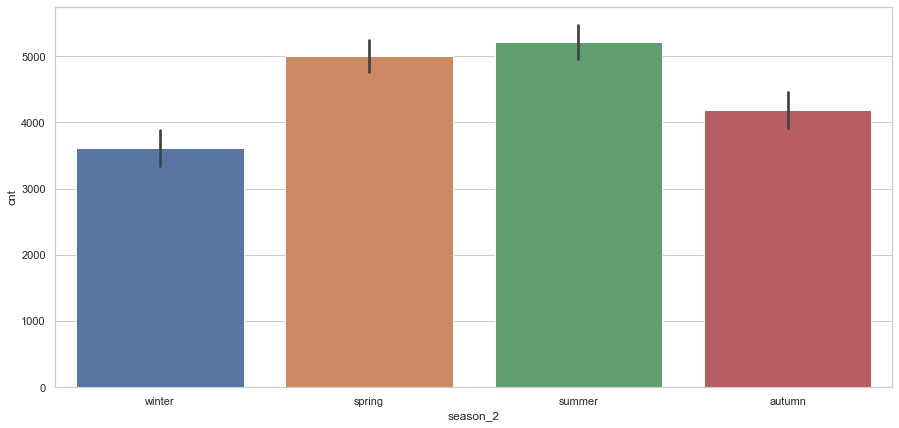

In [64]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="cnt", data=df_bike)

### ¿Cuantas reservas se hacen pos season y por tipo de cliente?

In [65]:
x= df_bike.groupby(['season']).agg({'cnt': ['sum'],'casual': ['sum'],'registered': ['sum']}).stb.subtotal()
x

,cnt,casual,registered
,sum,sum,sum
season,,,
autumn,1061129,226091,835038
spring,469514,60557,408957
summer,918589,203522,715067
winter,841613,129782,711831
grand_total,3290845,619952,2670893


<AxesSubplot:xlabel='registered', ylabel='season'>

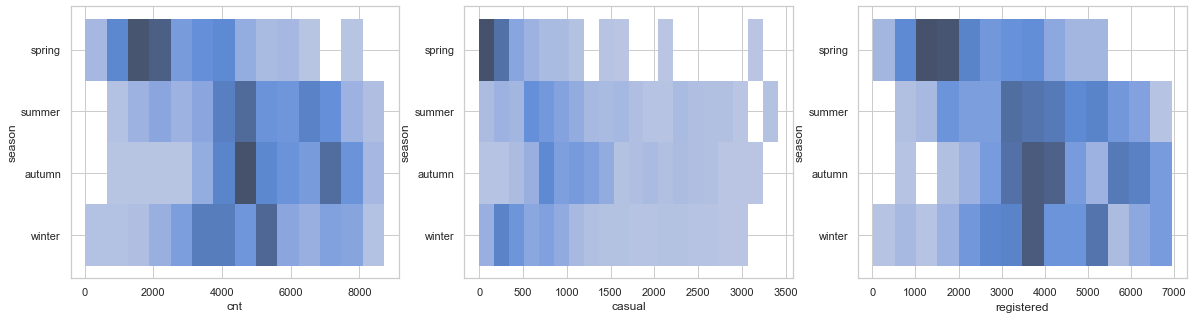

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(data=df_bike, x="cnt",y="season",ax=axes[0])
sns.histplot(data=df_bike, x="casual",y="season",ax=axes[1])
sns.histplot(data=df_bike, x="registered",y="season",ax=axes[2])

#HAY MAS RESERVAS DE GENTE REGISTRADA QUE CASUAL

--------

# COLUMNA YEAR

QUE HA PASADO AQUI . ¿QUE AÑO SE HA RESERVADO MÁS 2018 0 2019?

----

# COLUMNA MONTH

QUE MESES INFLUYEN MAS A LAS RESERVAS

----

# COLUMNA HOLIDAY : 1 = festivo /  0 = no festivo

    HAY MAYOR NUMERO DE RESERVAS LOS NO FESTIVOS

    RESERVAS GENERALES: 
        MAX  registrados reservan mas NO festivos DESTACA
        MIN los que menos reservan son CASUALES tanto festivo como no festivo

        SUMA EN NO FESTIVO
            REGISTRADOS 2.614.817 RESERVAS EN NO FESTIVO
            CASUAL 597.593 RESERVAS EN NO FESTIVO

        SUMA EN FESTIVO
            REGISTRADOS 56.076 RESERVAS EN  FESTIVO
            CASUAL 22.359 RESERVAS EN NO FESTIVO

df_bike.groupby(["holiday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)
# hay mas número de reservas en dias NO festivos

<AxesSubplot:xlabel='holiday', ylabel='count'>

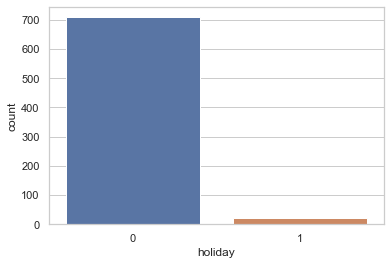

In [67]:
sns.countplot(x='holiday', data=df_bike)

-----

# COLUMNA weekday: 
### 1- LUNES 2-MARTES  3-MIERCOLES  4- JUEVES  5-VIERNES 6-SÁBADO  0 -DOMINGO 

     Hay bastante igualdad entre los dias de la semana, siendo el ranking de más a menos reservas:
     ORDEN DE DIAS POR RESERVA: Viernes, jueves,sabado, miercoles,martes,lunes y domingo.


In [68]:
df_bike.groupby(["weekday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)

cnt                               casual                     \
                min      max        sum      mean    min      max       sum   
weekday                                                                       
0             605.0   8227.0   444027.0   4228.83   54.0   3283.0  140521.0   
1              22.0   7525.0   455503.0   4338.12    2.0   3065.0   70784.0   
2             683.0   7767.0   469109.0   4510.66    9.0   1348.0   57843.0   
3             441.0   8173.0   471214.0   4574.89    9.0   2562.0   57254.0   
4             431.0   7804.0   485395.0   4667.26   15.0   1405.0   61460.0   
5            1167.0   8362.0   487790.0   4690.29   38.0   2469.0   78238.0   
6             627.0   8714.0   477807.0   4550.54   57.0   3410.0  153852.0   
grand_total  3976.0  56572.0  3290845.0  31560.60  184.0  17542.0  619952.0   

                     registered                                
                mean        min      max        sum      mean  
weekday                                                        
0            1338.30      451.0   5657.0   303506.0   2890.53  
1             674.13       20.0   6435.0   384719.0   3663.99  
2             556.18      573.0   6697.0   411266.0   3954.48  
3             555.86      432.0   6946.0   413960.0   4019.03  
4             590.96      416.0   6781.0   423935.0   4076.30  
5             752.29     1129.0   6917.0   409552.0   3938.00  
6            1465.26      570.0   5966.0   323955.0   3085.29  
grand_total  5932.98     3591.0  45399.0  2670893.0  25627.62

<AxesSubplot:xlabel='weekday', ylabel='registered'>

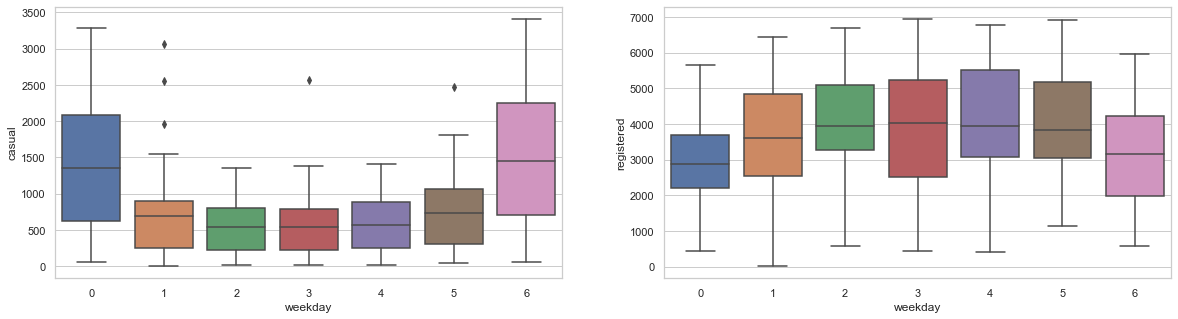

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(data=df_bike, x='weekday', y='casual',ax=axes[0])
sns.boxplot(data=df_bike, x='weekday', y='registered',ax=axes[1])

----

# COLUMNA workingday :  1 - LABORABLE  /  0 -FIN DE SEMANA

In [70]:
df_bike.groupby(["workingday"]).agg({ 'cnt': ['min','max','sum','mean'],'casual': ['min','max','sum','mean'],'registered': ['min','max','sum','mean']}).stb.subtotal().round(2)
# 1 dia laborable - hay muchas mas reservas en días laborables que festivos, mas de el doble.

cnt                              casual                    \
               min      max        sum     mean    min     max       sum   
workingday                                                                 
0            605.0   8714.0  1000269.0  4330.17   54.0  3410.0  316732.0   
1             22.0   8362.0  2290576.0  4590.33    2.0  2469.0  303220.0   
grand_total  627.0  17076.0  3290845.0  8920.50   56.0  5879.0  619952.0   

                     registered                               
                mean        min      max        sum     mean  
workingday                                                    
0            1371.13      451.0   5966.0   683537.0  2959.03  
1             607.66       20.0   6946.0  1987356.0  3982.68  
grand_total  1978.79      471.0  12912.0  2670893.0  6941.71

---

# COLUMNA weathersit: GRADOS 

---

# COLUMNA TEMPERATURA

hay que hacer encoding con etiquetas para las graficas

---

# COLUMNA HUMEDAD

hay que hacer encoding con etiquetas para las graficas

---

# Tabla viento: encoding

In [71]:
df_bike['wind_interval'] = pd.cut(df_bike['windspeed'], 5, labels=["very_low", "low", "medium", "high", "very_high"], ordered=True)

In [72]:
df_bike['wind_interval'] = df_bike['wind_interval'].astype('object')

 - Al utilizar el método pd.cut nos devuelve una columna categórica, por eso lo cambiamos a tipo int64. Ahora ya tenemos codificada esta columna.

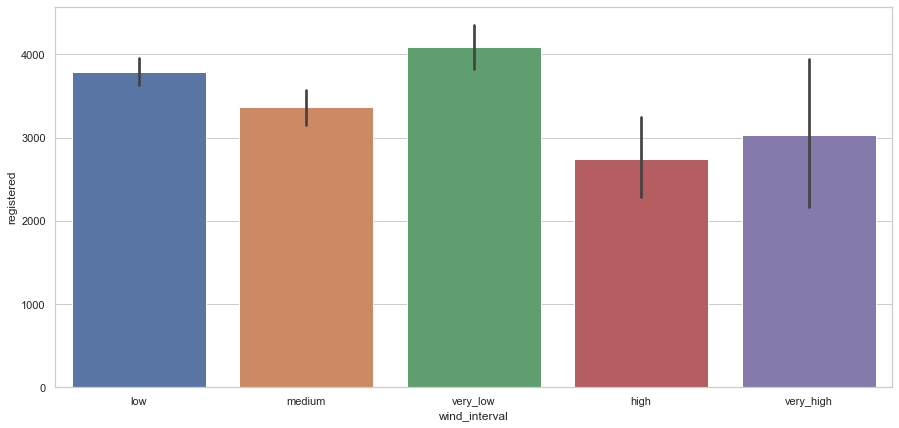

In [73]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="wind_interval", y="registered", data=df_bike)

----

# COLUMNA cnt , registred y casual

In [ ]:
fig,axes= plt.subplot(3,1, figsize= (30,10))
axes= axes.flat
sns.distplot(df_bike.cnt, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1},ax=axes[0])
sns.distplot(df_bike.registered, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1},ax=axes[1])
sns.distplot(df_bike.casual, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1},ax=axes[2]);


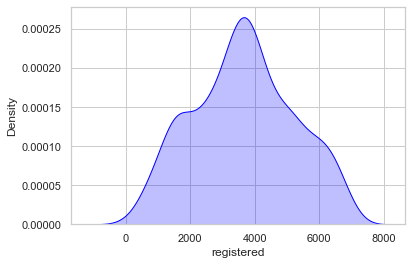

In [81]:
sns.distplot(df_bike.registered, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1});

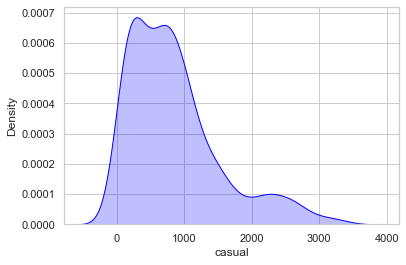

In [82]:
sns.distplot(df_bike.casual, hist=False, color="blue", kde_kws= {"shade": True, "linewidth":1});

Explicamos de que van nuestras columnas:

COLUMNAS:

- **Holiday** : 1 = festivo / 0 = no festivo
- **Weekday** = 0 Domingo - 6 Sábado
- **Workingday** = 1 laborable / 0 finde
- **Weathersit** = grados en el readme
- **Temperatura** = 
- **Humedad** =
- **Viento** = 
- **Casual** = nº de usuarios no registrados/día
- **Registered** = nº de usuarios registrados/día
- **Total** = total de usuarios/día


# ANTES DE ESTE PROCESO, DEBERÍAN ESTAR LAS COLUMNAS CON ENCODING CREADAS, Y HABER EXAMINADO CON GRAFICAS Y TAL

ELiminar las columnas

Una vez eliminadas las columnas : "dtday", "season" sin modificar , "instant" y "atemp"

In [ ]:
df.drop(["","",""], axis=1, inplace=True)

¿Están todas como deberian? Object, float, ....etc? Si no es asi es momento de cambiarlo.

df.dtypes()

Reordenar a preferencia  o más rapida lectura o entendimiento

In [ ]:
df_bike=df_bike.reindex(columns=[ 'yr', 'mnth','day', 'holiday', 'weekday',
                                'workingday', 'weathersit', 'temp', 'atemp', 'hum', 
                                'windspeed', 'casual', 'registered', 'cnt'])

Renombrar las columnas:

In [ ]:
df.rename(columns= {"edad":"edad",...},inplace=True)

Hacer un describe

In [ ]:
pd.set_option("display.float_format",lambda x: "%3.f" %x) #Usamos esta linea de código para que no aparezca los exponenciales
df.describe().T

In [ ]:
df.info()

Valores nulos y que hacer con ellos

In [ ]:
df.stb.missing()
x = df.dropna()  # eliminamos o cambiamos por otro valor? moda? media? mediana?


Tenemos outliers? ¿Que hacemos con ellos?

PRIMERO SELECCIONA LAS VARIABLES NUMÉRCIAS

In [ ]:
df_numericas= df.select_dtypes(include="int64")

BOXPLOT PARA VER 

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(15,25))
for i in range(len(numericas.columns)):
    sns.boxplot(x = numericas.columns[i], data = df,palette= "YlGnBu", ax=axes[i]); # para trazar una línea de densidad

plt.show()

VOY A DETECTAR LOS OUTLIERS

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [ ]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)
for key, values in ind.items():
    print('Para la variable ' + key  + ' tenemos ' + str(len(values)) +' valores outliers,  esto es un ' + str(round(len(values)/df.shape[0]*100 + '%\ de los datos')

VUELVE A REVISAR EL DESCRIBE PARA VER SI QUIERES SUSTITUIR UN VALOR

In [ ]:
df.describe().T

In [ ]:
# POR SI QUIERO CAMBIAR ALGUNA COLUMNA POR ALGUNA VALOR: DE MEDIANA , MEDIA, MODA
[df["price"].replace({x:71},inplace=True) for x in df["price"]]

#OTRAS OPCIONES
for k,v in ind.items():
    mediana= df[k].median()
    for i in v:
       df.loc[i,k] = mediana 

#OTRAS KNN METODO(VECINOS)


VUELVES A REVISAR BOXPLOT PARA VER SI YA NO TIENES OUTLIERS

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

# YA DEBE ESTAR TODO LIMPIO , CON ENCOGING, COLUMNAS NUMERICAS Y CATEGORICAS, TODO COMPLETITO PARA SIGUIENTE PASO

REGRESIÓN SIMPLE DE LAS 3 VARIABLES DEPENDIENTE :

Y = ¿CUANTAS BICIS SE RESERVAN EN 2018 Y 2019 EN GENERAL "CNT"?

Y1 = ¿CUANTAS BICIS SE RESERVAN EN 2018 Y 2019 CLIENTES registered ? 

Y2= ¿CUANTAS BICIS SE RESERVAN EN 2018 Y 2019 CLIENTES CASUAL?

### REGRESION LINEAL MULTIPLE CON VARIABLES NUMÉRICAS Y CATEGORIAS

🚨🚨 PRIMERO HAGO UN GROUPBY DE COMO VA A SER MI DF, POR QUE HEMOS INCLUIDO COLUMNAS EXTRAS , REDUNDANTES Y CATEGORICAS, QUE SOLO NOS HAN SERVIDO AL PRINCIPIO PARA LAS GRAFICAS.

In [ ]:

df = df.groupby(['col1', 'col2'])

HACEMOS LA CORRELACION DE LAS VARIABLES INDEPENDIENTES( AQUELLAS A QUIENES PREGUNTAMOS ESPERANDO LA RESPUESTA (Y))

In [ ]:
df.corr()

#solo se puede hacer con variables numericas
# de las mas correlacionadas, ¿con cual me quedo? con la mas importante.
# ¿Puede que nos quedemos con la temperatura y pasamos de la sensacion termica.

In [ ]:
sns.heatmap(numericas.corr()
            cmap="YIGnBu",
            annot= True);

#vamos a ver cual se realaciona mas, en caso que alguna fuera 0,7 o -0,7 eligo entre esas

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df_numericas.corr() 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

Hacemos una ANOVA, por que a veces nos da informacion, cual es la diferencia entre hacer la anova y un skinlearning.

Objetivos de hacer una anova, por si te sale una variable no significativa pues no la smetemos en la regresión.

PAra ver de que depende mi modelo-.

In [ ]:
#Limpiamos los outliers , nosotras ya lo hemos hecho arriba

Comprobación asunciones

    normalidad: shapiro

In [ ]:
# Normalidad aqui SOLO VEMOS cnt por que es variable respuesta
#SOLO SE NORMALIZA LA RESPUESTA
#¿Son normales nuestros datos? Podemos verlo con un displot 
# Vemos Shapiro para testear la normalidad de los datos ( kologrov)

# Si shapiro es p> 0,05 no es significativo y nuestros DATOS NORMALES // P< 0,05 valores NO NORMALES no se puede rechazar HO
stats.shapiro (df["cnt"])

In [ ]:
# Si no son normales podemos transformar por : LOG, RAIZ CUADRADA Y BOX COX(
df["cnt"],lambda_ajustada= stats.boxcox(df["cnt"])

In [ ]:
#Hacemos de nuevo el shapiro a ver si lo hemos normalizado
stats.shapiro (df["cnt"])

    homocedasticidad :  test levene

    pvalor < 0,05 NO SIGNIFICATIVO, CUMPLE ASUNCIÓN , TIENEN VARIANZAS SIMILARES
    P valor > 0,05 SIGNIFICATIVO , no cumple asunción, NO TIENEN VARIANZAS SIMILARES

    

In [ ]:
#se aplica a categoricas y numericas
#primera categoricas

fig,axes = plt.subplots(1,4,figsize =(30,10))

axes= axes.float

colum_cat= df.select_dtypes(include=["object", "category"]).lista_columnas

for i,col in enumerate(colum_cat):
    sns,boxplot(
        x= col,
        y= "cnt",
        data= df_bike,
        palette= "tab10",
        ax= axes[i]
    )

In [ ]:
def datos_test_levene(columan,df):
    valoresr=df[columna].unique()
    d= {}

for x in valroes:
    d[x]= df[df(columna) == x]["cnt"]

Aqui nos saca los diferentes Dataframes

In [ ]:
sexo= detectar_test_levene("temperatura",df) #esta sobre la categorica creada low, high,...
smoker= detectar_test_levene("viento",df)
region= detectar_test_levene("humedad",df)
hijos= detectar_test_levene("season",df)

Ahora comprobamos levene para estos Df

In [ ]:
stats.levene(temperatura[0], temperatura[1], temperatura[2], temperatura[3], center = "median")
stats.levene(viento["low"], viento["high"], viento["2"], viento["3"], center = "median")
stats.levene(humedad["low"], humedad["high"], humedad["2"], humedad["3"], center = "median")
stats.levene(season["low"], season["high"], season["2"], season["3"], center = "median")

#ejemplo
levene_hijos = stats.levene(hijos['1'], hijos['2'], hijos['3'], hijos['4'], hijos['5'],  center='median')
levene_hijos

In [ ]:
# ANOVA 

ANTES DEBERIAMOS HACER UN ENCODING A LAS CATEGORICAS, SI NO, NO ACEPTARÁ ESTOS DATOS

In [ ]:
df_copia = df.copy()

# iniciamos el método
le = LabelEncoder()

# lo aplicamos a todo nuestro dataframe 
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

REGRESION MULTIPLE LINEAL: QUEREMOS SABER EL NUMERO TOTAL DE RESERVAS DE BICIS Y SI LAS VARIABLES INDEPENDIENTES, NOS AYUDAN A CONOCERLO Y EN QUE MEDIDA, SEGÚN LA RESPUESTA DEL MODELO.

In [ ]:
x =df_numericas.drop(columns = ['cnt','registered', 'casual' ]) #Quitamos nuestra variable dependiente.
y = df_numericas['cnt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresión lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

UNA VEZ QUE CONOZCAMOS ESTOS DATOS, PODEMOS VER SI PODRIAN MEJORAR Y DEBEMOS ESTANDARIZAR Y PROBAR DE NUEVO

DESPUÉS LOS TEST